In [7]:
#Authors 
#Maria Giselle Fernandez-Godino
#email: mariagisellefernandez@gmail.com
#Acknowledgments: Qingkai Kong

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
import requests
from io import BytesIO

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [8]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Concentric_circles_isotropy.svg/768px-Concentric_circles_isotropy.svg.png'
url = 'http://www.pngall.com/wp-content/uploads/4/Matryoshka-Doll-PNG-Image-180x180.png'
url = 'http://i.stack.imgur.com/Stt6Q.png'
url = 'http://www.freepngclipart.com/download/tattoo/48757-tattoo-designs-coloring-bat-book-zentangle-mandala.png'

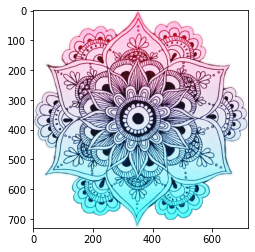

In [9]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

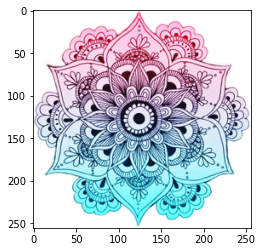

In [10]:
img = img.resize((256, 256))
plt.imshow(img)

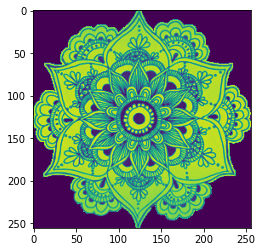

In [11]:
if len(np.array(img).shape) == 2:
  gray_img = np.array(img)
else:
  gray_img = np.array(ImageOps.grayscale(img))
plt.imshow(gray_img)

In [12]:
import torch

In [13]:
image_d = torch.FloatTensor(np.asarray(gray_img.reshape(1, 1, 256 , 256)))

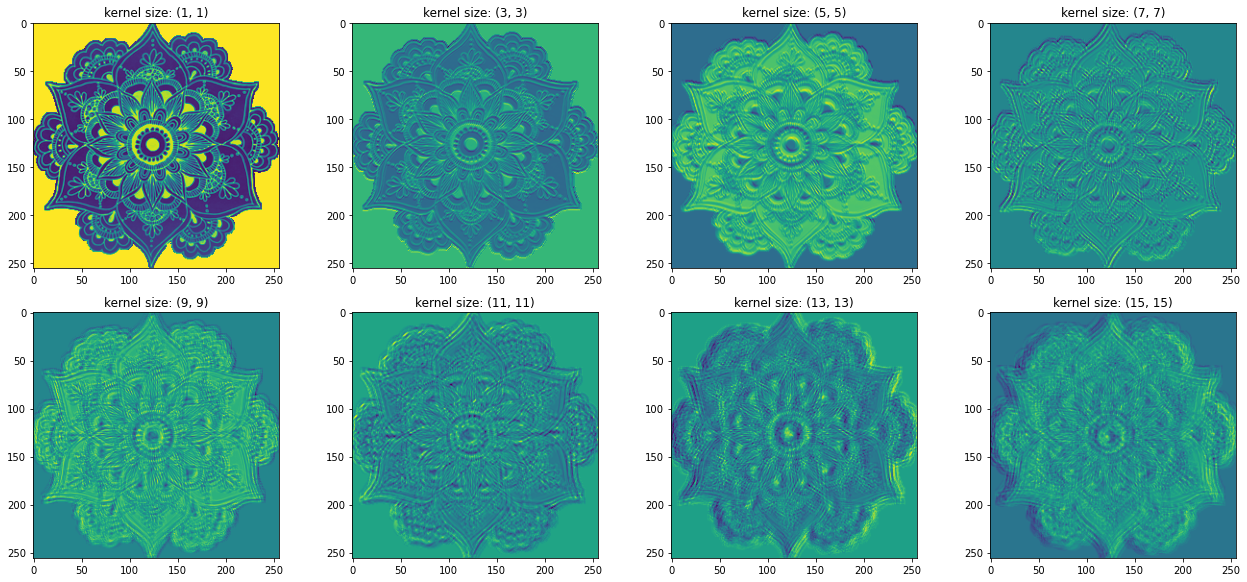

In [16]:
specify_kernel = False
fig = plt.figure(figsize=(18, 16))
for i, ks in enumerate(range(1, 17, 2)):
  conv2 = torch.nn.Conv2d(1, 1, kernel_size=(ks,ks), stride=1, padding=ks//2)
  if specify_kernel:
    conv2.weight.data.fill_(1)
    conv2.bias.data.fill_(0)
  feature_map = conv2(image_d)
  ax = fig.add_subplot(4, 4, i+1)
  ax.imshow(feature_map[0][0].data.numpy())
  ax.set_title(f'kernel size: {(ks, ks)}')

plt.tight_layout()
plt.show()

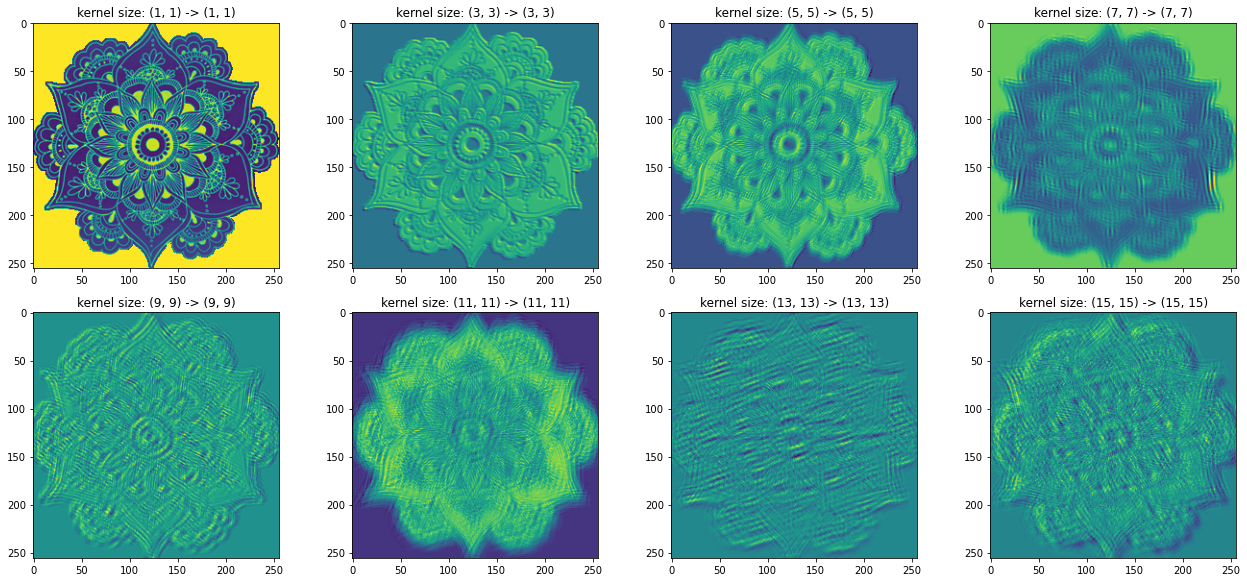

In [17]:
fig = plt.figure(figsize=(18, 16))
for i, ks in enumerate(range(1, 17, 2)):
  conv2 = torch.nn.Conv2d(1, 1, kernel_size=(ks,ks), stride=1, padding=ks//2)
  if specify_kernel:
    conv2.weight.data.fill_(1)
    conv2.bias.data.fill_(0)
  feature_map = conv2(image_d)

  conv2 = torch.nn.Conv2d(1, 1, kernel_size=(ks,ks), stride=1, padding=ks//2)
  if specify_kernel:
    conv2.weight.data.fill_(1)
    conv2.bias.data.fill_(0)
  feature_map2 = conv2(feature_map)

  ax = fig.add_subplot(4, 4, i+1)
  ax.imshow(feature_map2[0][0].data.numpy())
  ax.set_title(f'kernel size: {(ks, ks)} -> {(ks, ks)}')

plt.tight_layout()  
plt.show()

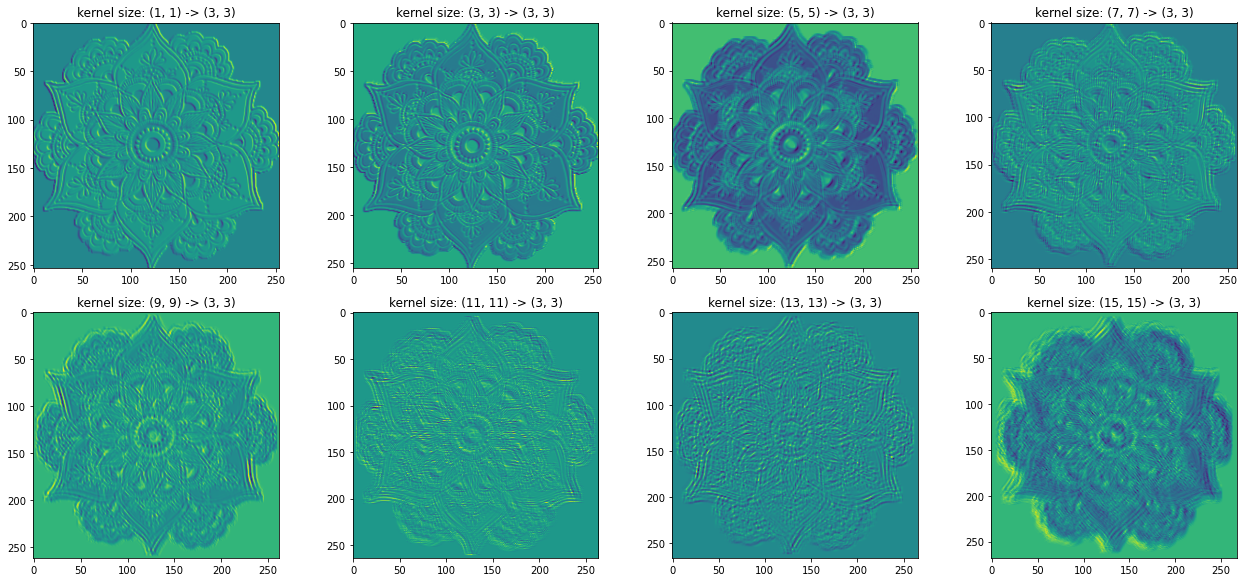

In [18]:
fig = plt.figure(figsize=(18, 16))
for i, ks in enumerate(range(1, 17, 2)):
  conv2 = torch.nn.Conv2d(1, 1, kernel_size=(ks,ks), stride=1, padding=ks//2)
  if specify_kernel:
    conv2.weight.data.fill_(1)
    conv2.bias.data.fill_(0)
  feature_map = conv2(image_d)

  conv2 = torch.nn.Conv2d(1, 1, kernel_size=(3,3), stride=1, padding=ks//2)
  if specify_kernel:
    conv2.weight.data.fill_(1)
    conv2.bias.data.fill_(0)
  feature_map2 = conv2(feature_map)

  ax = fig.add_subplot(4, 4, i+1)
  ax.imshow(feature_map2[0][0].data.numpy())
  ax.set_title(f'kernel size: {(ks, ks)} -> (3, 3)')

plt.tight_layout()  
plt.show()